In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sb 
import plotly.express as ex
import matplotlib.pyplot as plt

#                                                App details

In [ ]:
app_details=pd.read_csv('/content/Screentime - App Details.csv')
app_details.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [ ]:
app_details ['Date']=pd.to_datetime(app_details ['Date'])
app_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54 non-null     datetime64[ns]
 1   Usage          54 non-null     int64         
 2   Notifications  54 non-null     int64         
 3   Times opened   54 non-null     int64         
 4   App            54 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ KB


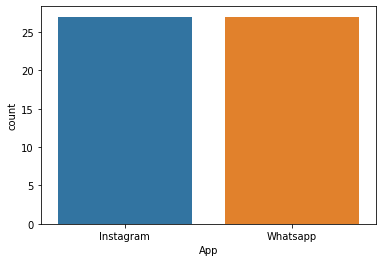

In [ ]:
sb.countplot(x=app_details ['App'])

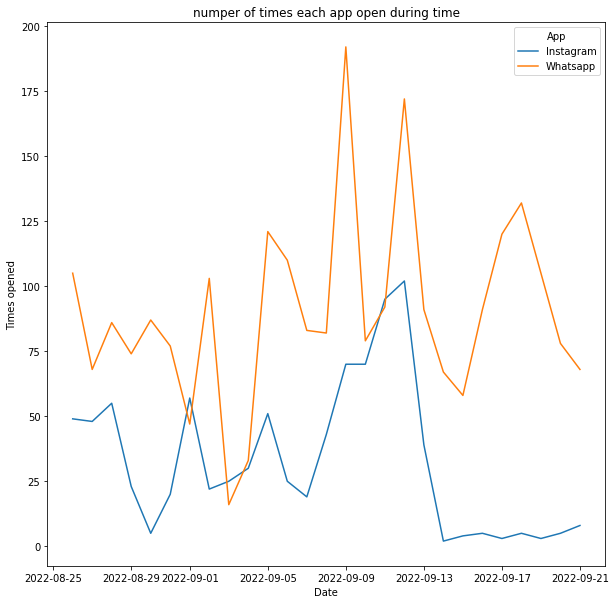

In [ ]:
plt.figure(figsize=(10,10))
sb.lineplot(x=app_details ['Date'],y=app_details ['Times opened'],hue=app_details ['App'])
plt.title('numper of times each app open during time')
plt.show()

From plot we see that :
The most used app is Whatsapp 

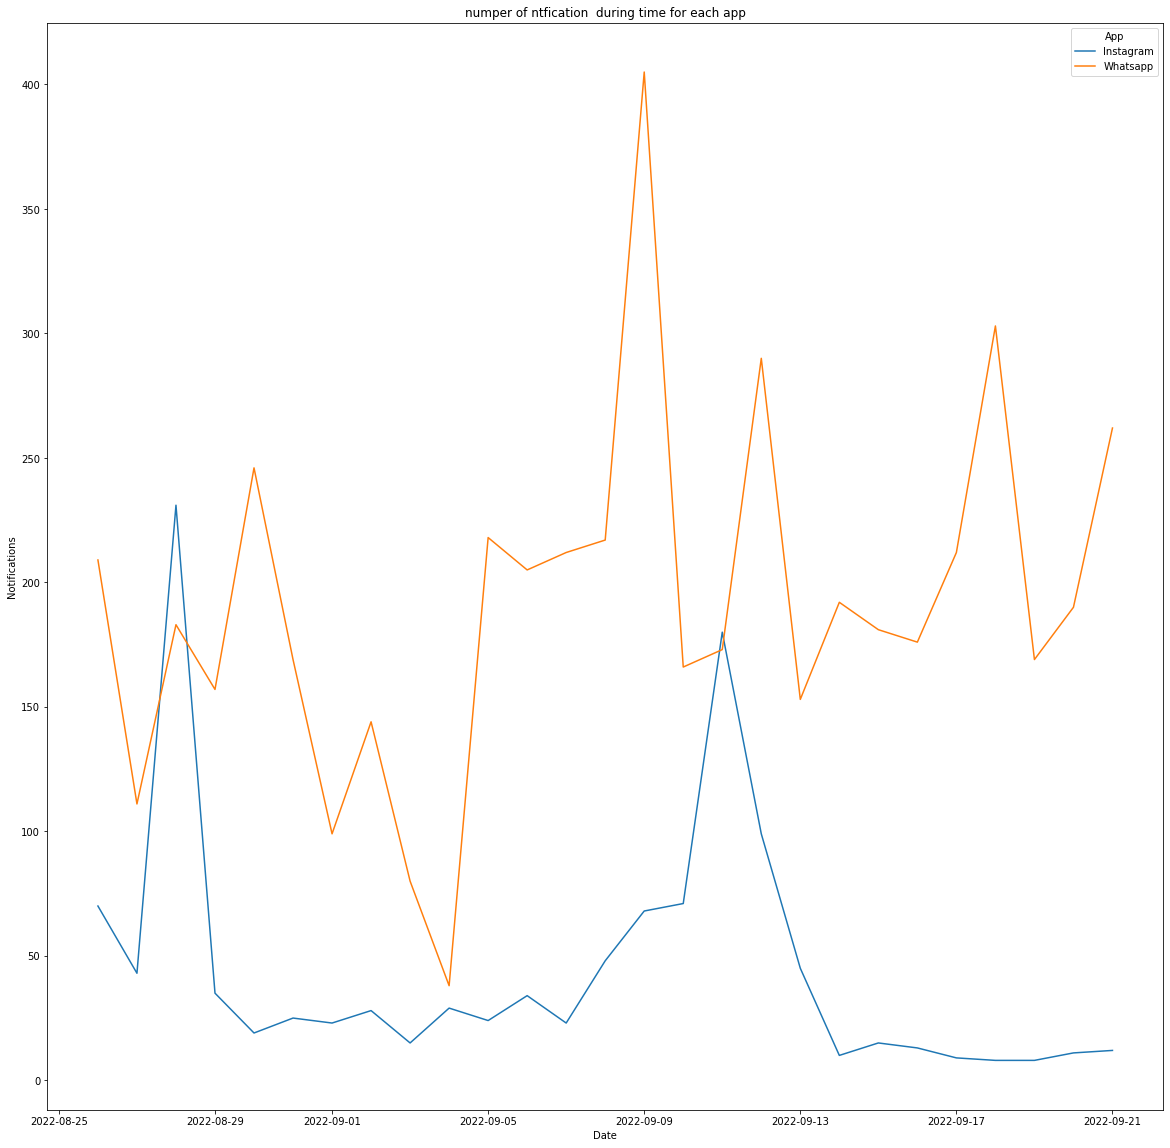

In [ ]:
plt.figure(figsize=(20,20))
sb.lineplot(x=app_details ['Date'],y=app_details.Notifications,hue=app_details ['App'])
plt.title('numper of ntfication  during time for each app')
plt.show()

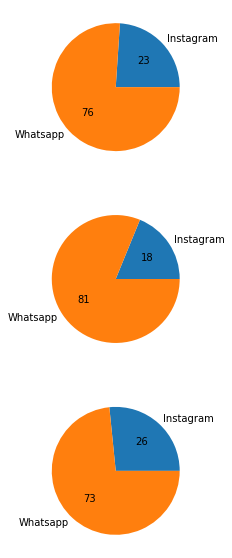

In [ ]:
notification =app_details.groupby('App').agg({'Usage':'mean','Notifications':'mean','Times opened':'mean'})
plt.figure (figsize=(10,10))
plt.subplot(311)
plt.pie(x=notification.Usage,labels=notification.index,autopct='%d')
plt.subplot(312)
plt.pie(x=notification.Notifications ,labels=notification.index,autopct='%d')
plt.subplot(313)
plt.pie(x=notification['Times opened'],labels=notification.index,autopct='%d')
plt.show()

In [ ]:
notification

,Usage,Notifications,Times opened
App,,,
Instagram,31.148148,44.296296,32.703704
Whatsapp,98.925926,191.111111,90.259259


From Pie chart number of notification affect the time of usage the app 

Do the number of notifications and the number of times the user opens an app have a correlation?

In [ ]:
app_details.corr()

,Usage,Notifications,Times opened
Usage,1.000000,0.774452,0.816409
Notifications,0.774452,1.000000,0.882983
Times opened,0.816409,0.882983,1.000000


# App Ranking

In [ ]:
ranking=pd.read_csv('/content/Screentime - App Ranking.csv')
ranking.columns

Index(['Date ', 'Rank 1', 'Rank 2', 'Rank 3'], dtype='object')

In [ ]:
df=pd.get_dummies(data=ranking,columns=['Rank 1', 'Rank 2', 'Rank 3'])
df.columns

Index(['Date ', 'Rank 1_Facebook', 'Rank 1_Instagram', 'Rank 1_Whatsapp',
       'Rank 1_Zoom', 'Rank 2_Chrome', 'Rank 2_Gallery', 'Rank 2_Instagram',
       'Rank 2_LinkedIn', 'Rank 2_Maps', 'Rank 2_Spotify', 'Rank 2_WeChat',
       'Rank 2_Whatsapp', 'Rank 2_YouTube', 'Rank 2_Zoom', 'Rank 3_Chrome',
       'Rank 3_Gmail', 'Rank 3_Hulu', 'Rank 3_Instagram', 'Rank 3_Linkedin',
       'Rank 3_Maps', 'Rank 3_Netflix', 'Rank 3_Spotify', 'Rank 3_WeChat',
       'Rank 3_YouTube'],
      dtype='object')

In [ ]:
rank1 = set(ranking['Rank 1'].unique())
rank2 = set(ranking['Rank 2'].unique())
rank3 = set(ranking['Rank 3'].unique())

app_list = rank1.union(rank2).union(rank3)
print(app_list)

{'Maps', 'Gmail', 'Facebook', 'Zoom', 'Chrome', 'Linkedin', 'Gallery', 'Netflix', 'Whatsapp', 'WeChat', 'Hulu', 'LinkedIn', 'Spotify', 'Instagram', 'YouTube'}


In [ ]:
ex.bar(x=ranking['Rank 1'].value_counts().index,y=ranking['Rank 1'].value_counts().values,title='cout of apps in rank 1')

Most used app in rank one is Whatsapp 

In [ ]:
ex.bar(x=ranking['Rank 2'].value_counts().index,y=ranking['Rank 2'].value_counts().values,title='cout of apps in rank 2')

Most app use in rank 2 is Instagram

In [ ]:
ex.bar(x=ranking['Rank 3'].value_counts().index,y=ranking['Rank 3'].value_counts().values,title='cout of apps in rank 3')

Wechat is the 3rd in use

In [ ]:
col=[]
for i in app_list:
    for name in df.columns:
        if i in name:
            col.append(name)
    print(col)
    ranking[i]=df[col].sum(axis=1)
    col=[]
ranking.head(5)

['Rank 2_Maps', 'Rank 3_Maps']
['Rank 3_Gmail']
['Rank 1_Facebook']
['Rank 1_Zoom', 'Rank 2_Zoom']
['Rank 2_Chrome', 'Rank 3_Chrome']
['Rank 3_Linkedin']
['Rank 2_Gallery']
['Rank 3_Netflix']
['Rank 1_Whatsapp', 'Rank 2_Whatsapp']
['Rank 2_WeChat', 'Rank 3_WeChat']
['Rank 3_Hulu']
['Rank 2_LinkedIn']
['Rank 2_Spotify', 'Rank 3_Spotify']
['Rank 1_Instagram', 'Rank 2_Instagram', 'Rank 3_Instagram']
['Rank 2_YouTube', 'Rank 3_YouTube']


,Date,Rank 1,Rank 2,Rank 3,Maps,Gmail,Facebook,Zoom,Chrome,Linkedin,Gallery,Netflix,Whatsapp,WeChat,Hulu,LinkedIn,Spotify,Instagram,YouTube
0,08/26/2022,Whatsapp,Instagram,Netflix,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,08/27/2022,Whatsapp,Instagram,Chrome,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,08/28/2022,Whatsapp,Instagram,WeChat,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
3,08/29/2022,Whatsapp,Chrome,WeChat,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
4,08/30/2022,Whatsapp,LinkedIn,Chrome,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
ranking.drop(['Rank 1', 'Rank 2', 'Rank 3'],axis=1,inplace=True)
ranking.columns

Index(['Date ', 'Maps', 'Gmail', 'Facebook', 'Zoom', 'Chrome', 'Linkedin',
       'Gallery', 'Netflix', 'Whatsapp', 'WeChat', 'Hulu', 'LinkedIn',
       'Spotify', 'Instagram', 'YouTube'],
      dtype='object')

In [ ]:
dic={}
g=ranking.drop(['Date '],axis=1)
for i in g.columns:
    a=g[i].sum()
    dic[i]=a
print(dic)
df=pd.DataFrame.from_dict(dic, orient='index')
df.index.rename('App',inplace=True)
df.rename(columns={0:'sum'},inplace=True)
df.columns

{'Maps': 3, 'Gmail': 2, 'Facebook': 1, 'Zoom': 5, 'Chrome': 6, 'Linkedin': 1, 'Gallery': 2, 'Netflix': 1, 'Whatsapp': 25, 'WeChat': 12, 'Hulu': 1, 'LinkedIn': 1, 'Spotify': 3, 'Instagram': 16, 'YouTube': 2}


Index(['sum'], dtype='object')

In [ ]:
df=df.sort_values('sum',ascending=False)
df.reset_index(inplace=True)

In [ ]:
ex.pie(names=df.App,values=df ['sum'])

Most used app is Whatsapp in all the ranks

# Overall

In [ ]:
over=pd.read_csv('/content/Screentime - Overall Usage.csv')
print(over.columns)
over.head()


Index(['Date ', 'Total Usage', 'Notifications', 'Unlocks'], dtype='object')


,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85


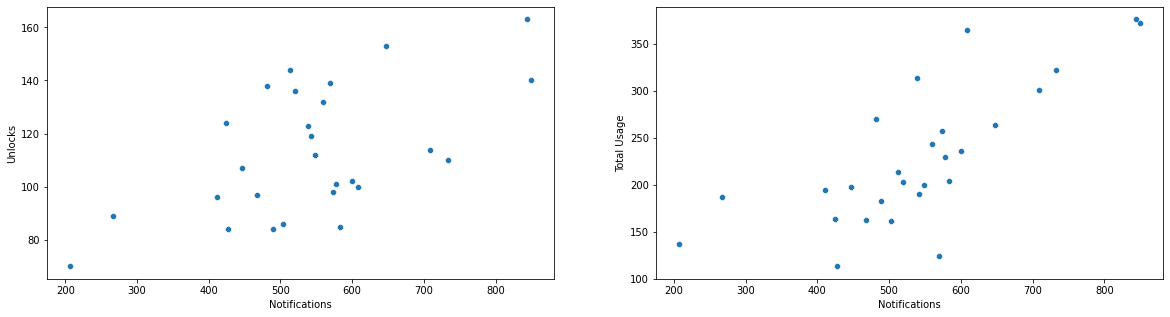

In [ ]:
plt.figure (figsize=(20,5))
plt.subplot(121)

sb.scatterplot(x=over.Notifications,y=over.Unlocks)
plt.subplot(122)
sb.scatterplot(x=over.Notifications,y=over['Total Usage'])
plt.show()

# **Summary**

Most usage app is Whatsapp then Instagram and Wechat   .                                                                             
App usage is direct proportional with the notifications      .                                                                            
Both total usage and unlocks are correlated with the number of notifications received.

